In [1]:
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import io
import cv2
import numpy as np
import os
from PIL import Image
import numpy as np
import pandas as pd
import os
import seaborn as sns
from PIL import Image
import cv2
from sklearn.metrics import f1_score
from keras.preprocessing.image import ImageDataGenerator, load_img
from skimage.filters import sobel
from skimage.measure import shannon_entropy
from skimage import img_as_ubyte
from sklearn.metrics import f1_score
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
tumor=os.listdir('/content/drive/MyDrive/BT_Aug/yes')
non_tumor=os.listdir('/content/drive/MyDrive/BT_Aug/no')

In [3]:
data=np.concatenate([tumor,non_tumor])

In [4]:
data

array(['aug_Y250_0_5875.jpg', 'aug_Y257_0_1557.jpg', 'aug_Y25_0_3449.jpg',
       ..., 'aug_No13_0_5754.jpg', 'aug_no 3_0_1319.jpg',
       'aug_14 no_0_4885.jpg'], dtype='<U21')

In [5]:
target_x=np.full(len(tumor),1)

In [6]:
len(tumor)

1085

In [7]:
len(non_tumor)

980

In [8]:
target_x1=np.full(len(non_tumor),0)

In [9]:
data_target=np.concatenate([target_x,target_x1])

In [10]:
X_data=[]

In [11]:
for file in tumor:
  img = cv2.imread('/content/drive/MyDrive/BT_Aug/yes/' + file)
  mri = cv2.resize(img, (256,256)) #convert all img to 256px
  b, g , r = cv2.split(mri) #convert B G R format to R G B format
  img = cv2.merge([r, g, b])
  X_data.append(img) #add to li

In [12]:
for file in non_tumor:
  img = cv2.imread('/content/drive/MyDrive/BT_Aug/no/' + file)
  mri = cv2.resize(img, (256,256)) #convert all img to 256px
  b, g , r = cv2.split(mri) #convert B G R format to R G B format
  img = cv2.merge([r, g, b])
  X_data.append(img) #add to li

In [13]:
X=np.squeeze(X_data)

In [14]:
X=X.astype('float32')

In [15]:
X/=255

In [16]:
X.shape

(2065, 256, 256, 3)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,data_target,test_size=0.1,random_state=3)

In [18]:
len(x_train)

1858

In [19]:
len(x_test)

207

In [20]:
import keras
from keras.applications.resnet import ResNet152
from keras.models import Model
restnet=ResNet152(include_top=False,weights='imagenet',input_shape=(256,256,3))
output=restnet.layers[-1].output
output=keras.layers.Flatten()(output)
restnet=Model(restnet.input, outputs=output)
for layer in restnet.layers:
  layer.trainable=False
restnet.summary()

234708992/234698864 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

In [21]:
features=restnet.predict(x_train)
features=features.reshape(features.shape[0],-1)

In [22]:
features_test=restnet.predict(x_test)
features_test=features_test.reshape(features_test.shape[0],-1)

In [23]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(features, y_train)
y_pred = clf.predict(features_test)
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8049    0.7253    0.7630        91
           1     0.8000    0.8621    0.8299       116

    accuracy                         0.8019       207
   macro avg     0.8024    0.7937    0.7964       207
weighted avg     0.8021    0.8019    0.8005       207



In [24]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[ 66,  25],
       [ 16, 100]])

Confusion matrix test accuracy


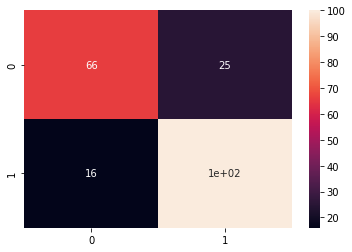

In [25]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

In [26]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
svm = SVC()
svm.fit(features, y_train)
y_pred = svm.predict(features_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7191    0.7033    0.7111        91
           1     0.7712    0.7845    0.7778       116

    accuracy                         0.7488       207
   macro avg     0.7451    0.7439    0.7444       207
weighted avg     0.7483    0.7488    0.7485       207



In [27]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[64, 27],
       [25, 91]])

Confusion matrix test accuracy


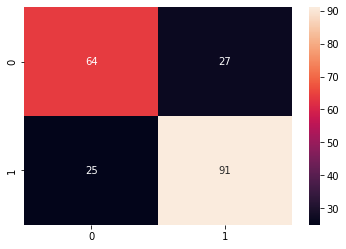

In [28]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(features, y_train)
y_pred = dt.predict(features_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7294    0.6813    0.7045        91
           1     0.7623    0.8017    0.7815       116

    accuracy                         0.7488       207
   macro avg     0.7459    0.7415    0.7430       207
weighted avg     0.7478    0.7488    0.7477       207



In [30]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[62, 29],
       [23, 93]])

Confusion matrix test accuracy


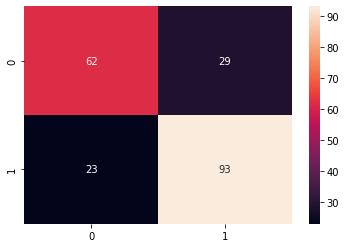

In [31]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

In [32]:
from sklearn.naive_bayes import GaussianNB
g=GaussianNB()
g.fit(features,y_train)
y_pred = g.predict(features_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6190    0.7143    0.6633        91
           1     0.7451    0.6552    0.6972       116

    accuracy                         0.6812       207
   macro avg     0.6821    0.6847    0.6803       207
weighted avg     0.6897    0.6812    0.6823       207



In [33]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[65, 26],
       [40, 76]])

Confusion matrix test accuracy


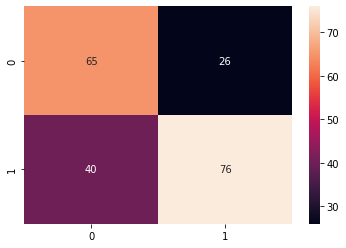

In [34]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

In [35]:
from sklearn.neighbors import KNeighborsClassifier
clf3 = KNeighborsClassifier(n_neighbors=3)
clf3.fit(features, y_train)
y_pred = clf3.predict(features_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7374    0.8022    0.7684        91
           1     0.8333    0.7759    0.8036       116

    accuracy                         0.7874       207
   macro avg     0.7854    0.7890    0.7860       207
weighted avg     0.7911    0.7874    0.7881       207



In [36]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[73, 18],
       [26, 90]])

Confusion matrix test accuracy


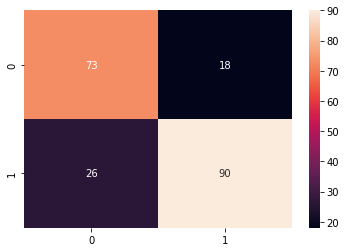

In [37]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

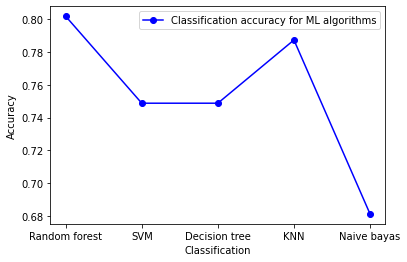

In [38]:
import matplotlib.pyplot as plt
classification=['Random forest','SVM','Decision tree','KNN','Naive bayas']
accuracy=[0.8019,0.7488,0.7488,0.7874,0.6812]
plt.plot(classification,accuracy,'b-o',label='Classification accuracy for ML algorithms');
plt.xlabel('Classification')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

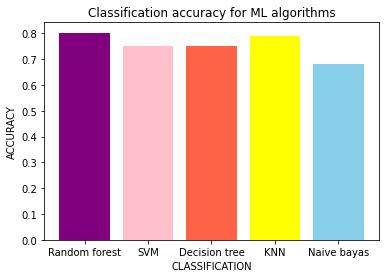

In [39]:
x=['Random forest','SVM','Decision tree','KNN','Naive bayas']
y =[0.8019,0.7488,0.7488,0.7874,0.6812]
plt.bar(x,y, color=['purple', 'pink', 'tomato', 'yellow', 'skyblue'])
plt.xlabel('CLASSIFICATION')
plt.ylabel("ACCURACY")
plt.title('Classification accuracy for ML algorithms')
plt.show()